In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import matplotlib as mpl


In [2]:
#load the first sheet of aggregationV3
df=pd.read_csv("../AggregationV4.csv")
df=df[:442].copy()

SF indicators:

In [3]:
SFindic=["MIR_Cpt_Fraction","Cpt_HII_region","FUV_Sources","Optical_Cluster","Diffuse_HII_Fraction"]

In [4]:
df

,CLOUDNUM,Round,Optical_Cluster,FUV_Sources,MIR_Cpt_Source,Cpt_HII_region,Diffuse_HII,N_Classifiers,Round_Fraction,MIR_Cpt_Fraction,...,SURFDENS,SIGMA0SQ,VIRPARAM,ECCEN,OLDNUM,RADIOSNR,RADIOHII,HST_AV,SF_class,SF_stage
0,2,4,0,1.0,1,0.0,0,5,0.800000,0.200000,...,310.560342,0.977351,1.162017,0.944541,2,0.000000,0.000000,0.315498,3,Early SF
1,3,4,0.5,0.0,1,0.0,0,4,1.000000,0.250000,...,NaN,NaN,NaN,NaN,3,0.000000,0.000000,0.077754,2,Embedded SF
2,4,0,1,0.0,5,1.0,1,5,0.000000,1.000000,...,109.389329,0.790975,2.669905,0.984195,4,0.011364,0.988636,0.454575,4,Late SF
3,5,3,3,6.5,4,2.0,4,4,0.750000,1.000000,...,536.428233,0.504695,0.347396,0.943428,5,0.880252,0.119748,0.503835,4,Late SF
4,6,5,1,0.0,5,0.0,1,5,1.000000,1.000000,...,NaN,NaN,NaN,NaN,6,0.000000,0.000000,0.475271,4,Late SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,439,3,4,5.0,3,1.0,3,3,1.000000,1.000000,...,1136.398939,1.447087,0.470188,0.935179,429,0.209093,0.790907,0.269483,4,Late SF
438,440,2,0,1.0,1,0.0,3,3,0.666667,0.333333,...,NaN,NaN,NaN,NaN,430,0.000000,0.000000,NaN,3,Early SF
439,441,3,0,0.0,0,0.0,3,3,1.000000,0.000000,...,NaN,NaN,NaN,NaN,431,0.000000,0.000000,0.076383,1,Dark
440,442,0,2,3.0,0,0.0,3,3,0.000000,0.000000,...,NaN,NaN,NaN,NaN,432,0.000000,0.000000,0.162993,4,Late SF


In [5]:
df.columns

Index(['CLOUDNUM', 'Round', 'Optical_Cluster', 'FUV_Sources', 'MIR_Cpt_Source',
       'Cpt_HII_region', 'Diffuse_HII', 'N_Classifiers', 'Round_Fraction',
       'MIR_Cpt_Fraction', 'Diffuse_HII_Fraction', 'err_Optical_Cluster',
       'err_FUV_Sources', 'err_Cpt_HII_region', 'S2N', 'NPIX', 'DISTANCE_PC',
       'BEAMFWHM_PC', 'BEAMMAJ_PC', 'BEAMMIN_PC', 'RMSTORAD', 'PPBEAM',
       'SIGCHAN_KMS', 'TMAX_K', 'XCTR_PIX', 'YCTR_PIX', 'VCTR_PIX', 'XCTR_DEG',
       'YCTR_DEG', 'VCTR_KMS', 'XMAX_PIX', 'YMAX_PIX', 'VMAX_PIX', 'XMAX_DEG',
       'YMAX_DEG', 'VMAX_KMS', 'MOMYPIX_NOEX', 'MOMYPIX', 'MOMVPIX_NOEX',
       'MOMVPIX', 'MOMXPIX_NOEX', 'MOMXPIX', 'FLUX_NOEX', 'FLUX_KKMS_PC2',
       'SIGV_KMS', 'MOMMAJPIX', 'MOMMAJPIX_NOEX', 'MOMMAJ_PC',
       'MOMMAJ_NODC_PC', 'MOMMAJPIX_NODC', 'MOMMAJPIX_NODC_NOEX', 'MOMMINPIX',
       'MOMMINPIX_NOEX', 'MOMMIN_PC', 'MOMMIN_NODC_PC', 'MOMMINPIX_NODC',
       'MOMMINPIX_NODC_NOEX', 'POSANG', 'PA_DC', 'FWHM_MIN_DC', 'FWHM_MAJ_DC',
       'RAD_PC', '

## Correlation plots b/w SF indicators

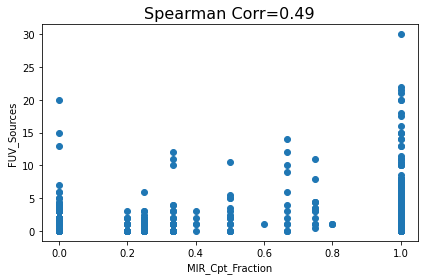

In [7]:
xlab=SFindic[0]
ylab=SFindic[2]

xs="linear"
ys="linear"

nanfilt=(df[xlab]=='#NUM!')|(df[ylab]=='#NUM!')
x=np.array(df[xlab][~nanfilt],dtype=float)
y=np.array(df[ylab][~nanfilt],dtype=float)
plt.figure()
plt.title("Spearman Corr={:.2f}".format(stats.spearmanr(x,y)[0]),fontsize=16)
plt.scatter(x,y)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.xscale(xs)
plt.yscale(ys)
plt.tight_layout()
# plt.savefig("X_"+xlab+"_Y_"+ylab+".png")
plt.show()
plt.close()

## Evolution Stage Classification

In [8]:
#somehow there are many "#NUM!" in "Optical_Cluster", get rid of these
df=df[df["Optical_Cluster"]!="#NUM!"]
len(df)

435

In [9]:
# np.array(df["MIR_Cpt_Fraction"],dtype=float)

In [10]:
binaryThresh=0.2

numThresh=1

MIRfracThresh=binaryThresh
diffHIIThresh=binaryThresh

cptHIIThresh=numThresh
fuvThresh=numThresh
clsThresh=numThresh



nothingFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)<MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)

embFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)>=MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)

earlyFilt=(~nothingFilt)&(~embFilt)&(np.array(df["Optical_Cluster"],dtype=float)<clsThresh)


lateFilt=(~nothingFilt)&(~embFilt)&(~earlyFilt)
# &\
#             ((np.array(df["Optical_Cluster"],dtype=float)>0.8)|(np.array(df["Diffuse_HII_Fraction"],dtype=float)>noThresh))

print(np.sum(nothingFilt))
print(np.sum(embFilt))
print(np.sum(earlyFilt))
print(np.sum(lateFilt))
print(np.sum(nothingFilt),np.sum(nothingFilt),np.sum(earlyFilt)+np.sum(lateFilt))
print(np.sum(nothingFilt)+np.sum(embFilt)+np.sum(earlyFilt)+np.sum(lateFilt))


69
55
96
215
69 69 311
435


In [11]:
df["CLOUDNUM"][nothingFilt]

7        9
8       10
10      12
14      16
15      17
      ... 
396    398
425    427
426    428
432    434
439    441
Name: CLOUDNUM, Length: 69, dtype: int64

In [12]:
df["CLOUDNUM"][embFilt]

1        3
9       11
12      14
17      19
18      20
24      26
30      32
38      40
40      42
49      51
53      55
60      62
65      67
73      75
77      79
87      89
92      94
98     100
107    109
143    145
152    154
174    176
194    196
210    212
240    242
242    244
266    268
273    275
276    278
294    296
301    303
306    308
311    313
331    333
340    342
342    344
353    355
355    357
357    359
363    365
368    370
369    371
370    372
376    378
379    381
381    383
401    403
407    409
414    416
417    419
422    424
428    430
430    432
431    433
441    443
Name: CLOUDNUM, dtype: int64

## Mass function plots


In [13]:
binaryThresh=0.2

numThresh=1

MIRfracThresh=binaryThresh
diffHIIThresh=binaryThresh

cptHIIThresh=numThresh
fuvThresh=numThresh
clsThresh=numThresh



nothingFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)<MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)

embFilt=(np.array(df["MIR_Cpt_Fraction"],dtype=float)>=MIRfracThresh)&\
                (np.array(df["Cpt_HII_region"],dtype=float)<cptHIIThresh)&\
                    (np.array(df["FUV_Sources"],dtype=float)<fuvThresh)&\
                        (np.array(df["Optical_Cluster"],dtype=float)<clsThresh)
earlyFilt=(~nothingFilt)&(~embFilt)&(np.array(df["Optical_Cluster"],dtype=float)<clsThresh)


lateFilt=(~nothingFilt)&(~embFilt)&(~earlyFilt)
# &\
#             ((np.array(df["Optical_Cluster"],dtype=float)>0.8)|(np.array(df["Diffuse_HII_Fraction"],dtype=float)>noThresh))

print(np.sum(nothingFilt))
print(np.sum(embFilt))
print(np.sum(earlyFilt))
print(np.sum(lateFilt))
print(np.sum(nothingFilt),np.sum(nothingFilt),np.sum(earlyFilt)+np.sum(lateFilt))
print(np.sum(nothingFilt)+np.sum(embFilt)+np.sum(earlyFilt)+np.sum(lateFilt))


69
55
96
215
69 69 311
435


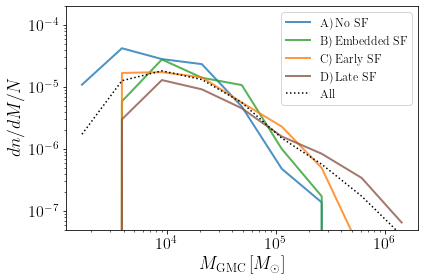

In [17]:
plt.rcParams["text.usetex"]=True
# plt.rcParams["xtick.direction"]="in"
# plt.rcParams["ytick.direction"]="in"
plt.rcParams["axes.labelsize"]=18
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

plt.figure(figsize=(6,4.))

bins=np.logspace(3,6.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

cDict={"A":"tab:blue","B":"tab:green","C":"tab:orange","D":"tab:brown"}

n,_=np.histogram(df["MLUM_MSUN"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label=r"$\rm A) \, No \ SF$",alpha=0.8,c=cDict["A"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label=r"$\rm B) \, Embedded \ SF$",alpha=0.8,c=cDict["B"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label=r"$\rm C) \, Early \ SF$",alpha=0.8,c=cDict["C"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label=r"$\rm D) \, Late \ SF$",alpha=0.8,c=cDict["D"],lw=2)

n,_=np.histogram(df["MLUM_MSUN"],bins)
plt.plot(binc,n/len(df)/binw,label=r"$\rm All$",c='k',ls=":",alpha=1)

plt.ylim(5e-8,2e-4)

plt.legend(fontsize=12)
plt.xscale("log")
plt.yscale("log")
# plt.ylim(1e-7,5e-5)
plt.xlabel(r"$M_{\rm GMC} \, [M_\odot]$")
# plt.ylabel(r"${\rm PDF } \ ({dn}/{N/ dM})$")
plt.ylabel(r"$dn/dM/N$")
plt.tight_layout()
plt.savefig("postdoc_GMC_PDF.pdf")


In [18]:
print(stats.ks_2samp(df["MLUM_MSUN"][nothingFilt], df["MLUM_MSUN"][embFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"][earlyFilt], df["MLUM_MSUN"][embFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"][earlyFilt], df["MLUM_MSUN"][lateFilt]))

KstestResult(statistic=0.36100131752305664, pvalue=0.0004595879727858909)
KstestResult(statistic=0.27367424242424243, pvalue=0.00831961993572794)
KstestResult(statistic=0.31017441860465117, pvalue=3.6816304574971426e-06)


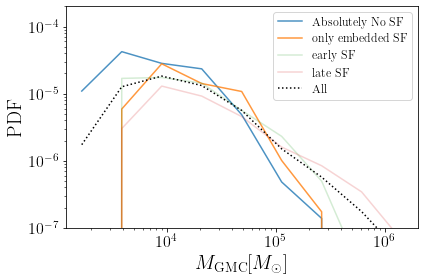

In [33]:
mpl.rcParams["text.usetex"]=True
mpl.rcParams["axes.labelsize"]=20
mpl.rcParams['xtick.labelsize']=16
mpl.rcParams['ytick.labelsize']=16

# plt.style.use("mypresentation")

bins=np.logspace(3,6.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

whichM=df["MLUM_MSUN"]

n,_=np.histogram(whichM[nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label=r"$\rm Absolutely \ No \ SF$",alpha=0.8)

n,_=np.histogram(whichM[embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label=r"$\rm only \ embedded \ SF$",alpha=0.8)

n,_=np.histogram(whichM[earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label=r"$\rm early \ SF$",alpha=0.2)


n,_=np.histogram(whichM[lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label=r"$\rm late \ SF$",alpha=0.2)

n,_=np.histogram(whichM,bins)
plt.plot(binc,n/len(df)/binw,label=r"$\rm All$",c='k',ls=":",alpha=1)

allSlpData=n/len(df)/binw


plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{\rm GMC} [M_\odot] \rm $")
plt.ylabel(r"$\rm PDF$")
plt.tight_layout()


In [35]:
import emcee

from scipy.optimize import minimize

import corner

def log_likelihood(theta, x, y, yerr):
    alpha,b = theta
    model = alpha*x+b
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((y - model) ** 2 / sigma2)


bins=np.logspace(4,7,20)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]

n,_=np.histogram(whichM,bins)
allSlpData=n/len(df)/binw

x=np.log10(binc)
y=np.log10(allSlpData)
yerr=np.ones_like(x)

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([-1,-1]) 
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml = soln.x
print(m_ml,b_ml)

-1.0 -1.0


/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_63568/514524090.py:22: RuntimeWarning: divide by zero encountered in log10
  y=np.log10(allSlpData)


In [73]:
df["MLUM_MSUN"].max()

1037117.026

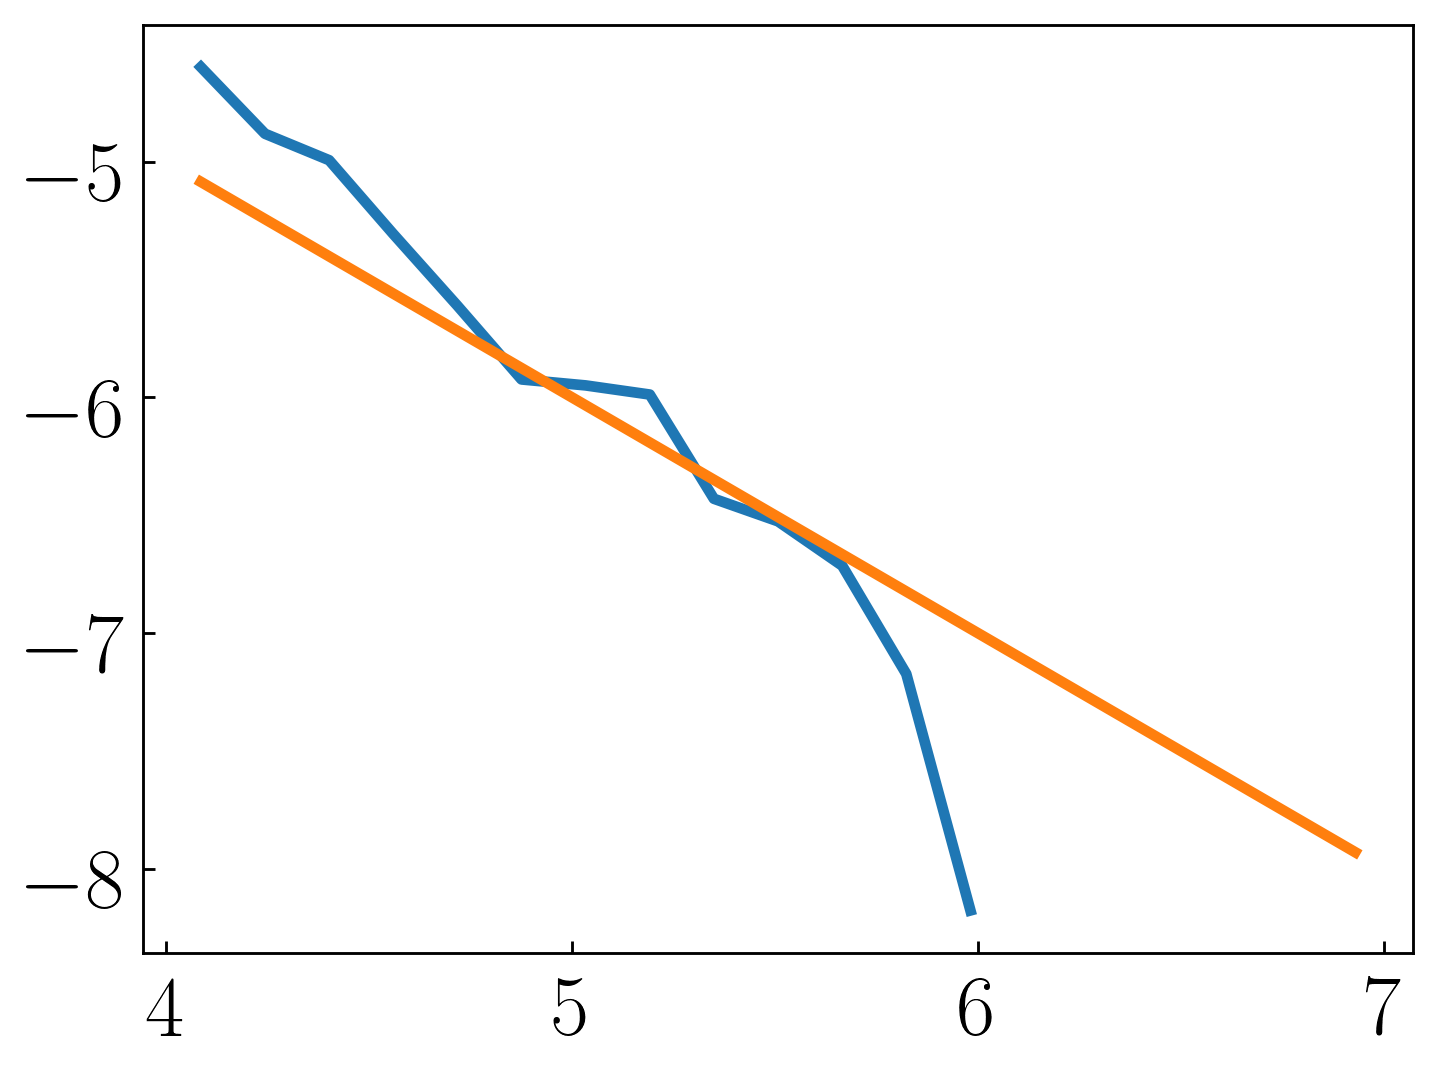

In [71]:

plt.plot(x,y)
plt.plot(x,m_ml*x+b_ml)


In [16]:
print(stats.ks_2samp(df["MLUM_MSUN"][nothingFilt], df["MLUM_MSUN"][embFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"][earlyFilt], df["MLUM_MSUN"][embFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"][earlyFilt], df["MLUM_MSUN"][lateFilt]))


KstestResult(statistic=0.36100131752305664, pvalue=0.0004595879727858909)
KstestResult(statistic=0.27367424242424243, pvalue=0.00831961993572794)
KstestResult(statistic=0.31017441860465117, pvalue=3.6816304574971426e-06)


In [15]:

print(stats.ks_2samp(df["MLUM_MSUN"], df["MLUM_MSUN"][nothingFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"], df["MLUM_MSUN"][embFilt]))
print(stats.ks_2samp(df["MLUM_MSUN"][nothingFilt], df["MLUM_MSUN"][embFilt]))

# plt.xscale("log")

KstestResult(statistic=0.39140429785107445, pvalue=1.0490695756537605e-08)
KstestResult(statistic=0.2884012539184953, pvalue=0.00043434866941016725)
KstestResult(statistic=0.36100131752305664, pvalue=0.0004595879727858909)


## extinction plots

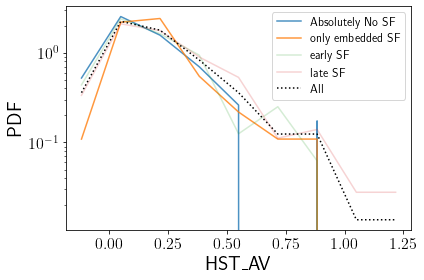

In [38]:
bins=np.linspace(-0.2,1.3,10)
binc=(bins[1:]+bins[:-1])/2
binw=bins[1:]-bins[:-1]


n,_=np.histogram(df["HST_AV"][nothingFilt],bins)
plt.plot(binc,n/np.sum(nothingFilt)/binw,label="Absolutely No SF",alpha=0.8)

n,_=np.histogram(df["HST_AV"][embFilt],bins)
plt.plot(binc,n/np.sum(embFilt)/binw,label="only embedded SF",alpha=0.8)

n,_=np.histogram(df["HST_AV"][earlyFilt],bins)
plt.plot(binc,n/np.sum(earlyFilt)/binw,label="early SF",alpha=0.2)

# n,_=np.histogram(df["HST_AV"][midFilt],bins)
# plt.plot(binc,n/np.sum(midFilt)/binw,label="middle SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"][lateFilt],bins)
plt.plot(binc,n/np.sum(lateFilt)/binw,label="late SF",alpha=0.2)

n,_=np.histogram(df["HST_AV"],bins)
plt.plot(binc,n/len(df)/binw,label="All",c='k',ls=":",alpha=1)


# plt.ylim(1e-7,2e-4)

plt.legend(fontsize=12)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("HST_AV")
plt.ylabel("PDF")
plt.tight_layout()
# plt.savefig("noSF_dust_PDF.png")

## GMC mass vs extinction

SpearmanrResult(correlation=0.3511111111111111, pvalue=0.07861852220819182)


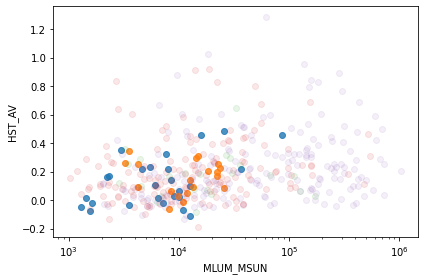

In [ ]:
plt.scatter(df["MLUM_MSUN"][nothingFilt],df["HST_AV"][nothingFilt],label="Absolutely No SF",alpha=0.8)
print(stats.spearmanr(df["MLUM_MSUN"][nothingFilt][np.isnan(df["HST_AV"][nothingFilt])==False],df["HST_AV"][nothingFilt][np.isnan(df["HST_AV"][nothingFilt])==False]))
plt.scatter(df["MLUM_MSUN"][embFilt],df["HST_AV"][embFilt],label="embedded SF",alpha=0.8)
plt.scatter(df["MLUM_MSUN"][earlyFilt],df["HST_AV"][earlyFilt],label="early SF",alpha=0.1)
plt.scatter(df["MLUM_MSUN"][midFilt],df["HST_AV"][midFilt],label="middle SF",alpha=0.1)
plt.scatter(df["MLUM_MSUN"][lateFilt],df["HST_AV"][lateFilt],label="late SF",alpha=0.1)

plt.xlabel("MLUM_MSUN")
plt.ylabel("HST_AV")
plt.xscale("log")
plt.tight_layout()
# plt.savefig("Mass_AV.png")

## Shape filter

In [ ]:
floatRF=np.array(df["Round_Fraction"],dtype=float)
round1Filt=(floatRF==1)
relaRoundFilt=(floatRF>0.5)
relaFilaFilt=(floatRF<0.5)
round0Filt=(floatRF==0)

## Dispersal mechanism

In [ ]:
df.columns

Index(['GMC Number', 'Round', 'Optical_Cluster', 'FUV_Sources',
       'MIR_Cpt_Source', 'Cpt_HII_region', 'Diffuse_HII', 'N_Classifiers',
       'Round_Fraction', 'MIR_Cpt_Fraction', 'Diffuse_HII_Fraction',
       'err_Optical_Cluster', 'err_FUV_Sources', 'err_Cpt_HII_region',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'CLOUDNUM', 'RA', 'DEC',
       'VLSR', 'RA_MAXPIX', 'DEC_MAXPIX', 'VLSR_MAXPIX', 'RGAL_KPC', 'NPIX',
       'S2N', 'TMAX_K', 'FLUX_KKMS_PC2', 'SIGV_KMS', 'MOMMAJ_PC', 'MOMMIN_PC',
       'MOMMIN_NODC_PC', 'POSANG', 'PA_DC', 'FWHM_MIN_DC', 'FWHM_MAJ_DC',
       'RAD_PC', 'RAD_NODC_NOEX', 'ALPHA_CO', 'MLUM_MSUN', 'MVIR_MSUN',
       'RAD3D_PC', 'PRESSURE', 'TFF_MYR', 'SURFDENS', 'SIGMA0SQ', 'VIRPARAM',
       'ECCEN', 'RADIOSNR', 'RADIOHII', 'HST_AV'],
      dtype='object')

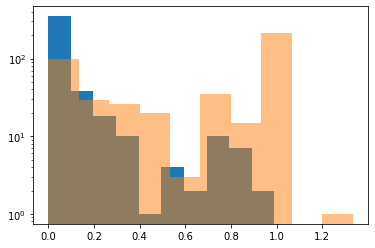

In [ ]:
plt.hist(np.array(df["RADIOSNR"],dtype=float))
plt.hist(np.array(df["Diffuse_HII_Fraction"],dtype=float),alpha=0.5)
plt.yscale("log")
plt.show()

In [ ]:
df["Diffuse_HII_Fraction"][np.array(df["Diffuse_HII_Fraction"],dtype=float)>1]

40    1.333333333
Name: Diffuse_HII_Fraction, dtype: object

(array([ 99.,  29.,  26.,  20.,   3.,  35.,  15., 214.,   0.,   1.]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333]),
 <a list of 10 Patch objects>)

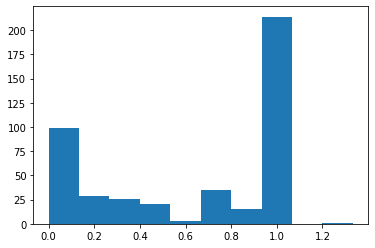

In [ ]:
plt.hist(arr)